In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from wordcloud import WordCloud
import seaborn as sns
from scipy import stats
import numpy as np

pd.options.mode.copy_on_write = True

In [3]:
# Load data
data = pd.read_csv('movies.csv',header=0)
data

,budget,original_language,original_title,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,bayesian_average,genre_list,company_list,country_list,language_codes,actor_names,job_name_pairs
0,30000000,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,7.658,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['en'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","[['Director', 'John Lasseter'], ['Screenplay',..."
1,65000000,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,6.844,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['en', 'fr']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","[['Executive Producer', 'Larry J. Franco'], ['..."
2,0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,6.022,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['en'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","[['Director', 'Howard Deutch'], ['Characters',..."
3,16000000,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,5.737,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['en'],"['Whitney Houston', 'Angela Bassett', 'Loretta...","[['Director', 'Forest Whitaker'], ['Screenplay..."
4,0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,5.671,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['en'],"['Steve Martin', 'Diane Keaton', 'Martin Short...","[['Original Music Composer', 'Alan Silvestri']..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44892,0,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,NaN,0.0,90.0,Subdue,4.0,1.0,5.612,"['Drama', 'Family']",[],['Iran'],['fa'],"['Leila Hatami', 'Kourosh Tahami', 'Elham Korda']","[['Director', 'Hamid Nematollah'], ['Producer'..."
44893,0,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,3.0,5.715,['Drama'],['Sine Olivia'],['Philippines'],['tl'],"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...","[['Director', 'Lav Diaz'], ['Writer', 'Lav Dia..."
44894,0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,6.0,5.533,"['Action', 'Drama', 'Thriller']",['American World Pictures'],['United States of America'],['en'],"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...","[['Director', 'Mark L. Lester'], ['Screenplay'..."
44895,0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,0.0,5.626,[],['Yermoliev'],['Russia'],[],"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav...","[['Director', 'Yakov Protazanov'], ['Producer'..."


# Analysis of Actors in successful movies

In the following section, the top 10th actors will be discussed and analysed in terms of their movies' rating, revenue and popularity.
<br>Firstly, the necessary columns were copied to a new dataframe for analysis.

In [4]:
analysis = data[['budget','popularity','revenue','bayesian_average','release_date','genre_list','actor_names']]
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            44897 non-null  int64  
 1   popularity        44897 non-null  float64
 2   revenue           44897 non-null  float64
 3   bayesian_average  44897 non-null  float64
 4   release_date      44823 non-null  object 
 5   genre_list        44897 non-null  object 
 6   actor_names       44897 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.4+ MB


In [5]:
# Format the date into datetime
analysis['release_date'] = pd.to_datetime(analysis['release_date'])
analysis['genre_list_lengths'] = analysis['genre_list'].apply(lambda x: len(ast.literal_eval(x)))
analysis.loc[:,'actor_names_lengths'] = analysis['actor_names'].apply(lambda x: len(ast.literal_eval(x)))
analysis = analysis[['budget','popularity','revenue','bayesian_average','release_date','genre_list_lengths', 'actor_names_lengths', 'genre_list','actor_names']]

for column in analysis.columns[:7]:
    min = analysis[column].min()
    max = analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 0  -  380000000


----- popularity -----
Range of values in 'popularity': 0.0  -  547.488298


----- revenue -----
Range of values in 'revenue': 0.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.417  -  8.6


----- release_date -----
Range of values in 'release_date': 1874-12-09 00:00:00  -  2017-12-27 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  8


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 0  -  313




From the above figures, we understand that some moives contain a list of 313 actors while some contain a blank list.
<br>Moreover, the range of movies is between 1874 and 2017. In our study, we would mainly focus on the recent movies.
<br>Therefore, those movies released before 2000 were filtered out.
<br><br>In addition, the actor_names were shorten to 3 actors as the lists were ordered according to their significance. In other words, only the first 3 leading actors would be studyed in the following section 
<br>Lastly, those movies with blank list of actors were dropped.

In [6]:
filtered_analysis = analysis[['budget','popularity','revenue','bayesian_average','release_date','genre_list_lengths', 'actor_names_lengths', 'genre_list','actor_names']].copy()
filtered_analysis = filtered_analysis[filtered_analysis['release_date'] >= pd.to_datetime('2000-01-01')]
filtered_analysis = filtered_analysis[filtered_analysis['actor_names'] != "[]"]
filtered_analysis = filtered_analysis.reset_index(drop=True)

for index, row in filtered_analysis.iterrows():
    list = ast.literal_eval(row['actor_names'])
    if len(list) > 3:
        updated_list = list[:3]
        filtered_analysis.at[index,'actor_names'] = updated_list
        filtered_analysis.loc[index,'actor_names_lengths'] = len(updated_list)
    else:
        filtered_analysis.at[index,'actor_names'] = list
        filtered_analysis.loc[index,'actor_names_lengths'] = len(list)

filtered_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22113 entries, 0 to 22112
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               22113 non-null  int64         
 1   popularity           22113 non-null  float64       
 2   revenue              22113 non-null  float64       
 3   bayesian_average     22113 non-null  float64       
 4   release_date         22113 non-null  datetime64[ns]
 5   genre_list_lengths   22113 non-null  int64         
 6   actor_names_lengths  22113 non-null  int64         
 7   genre_list           22113 non-null  object        
 8   actor_names          22113 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [7]:
for column in filtered_analysis.columns[:7]:
    min = filtered_analysis[column].min()
    max = filtered_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 0  -  380000000


----- popularity -----
Range of values in 'popularity': 0.001177  -  547.488298


----- revenue -----
Range of values in 'revenue': 0.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.417  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-01 00:00:00  -  2017-12-27 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  8


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 1  -  3




After refining the dataset, the top 20th actors with most acting movies can be studied.

## WordCloud of actor names

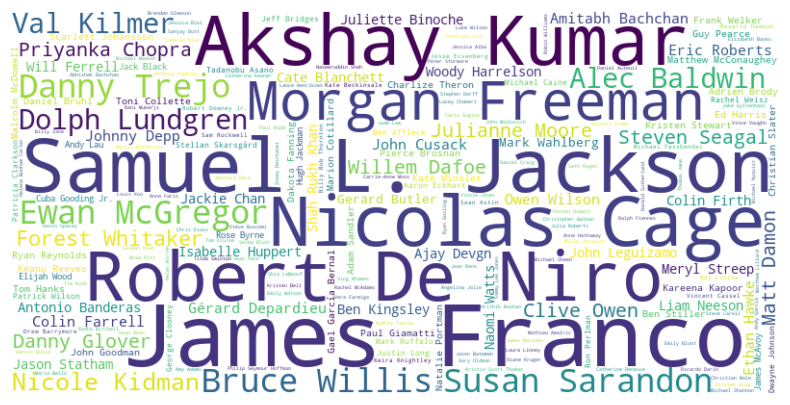

In [8]:
actors = []

for index, row in filtered_analysis.iterrows():
    for name in row['actor_names']:
        actors.append(name)

# Count word frequencies
actor_counts = pd.Series(actors).value_counts()

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(actor_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

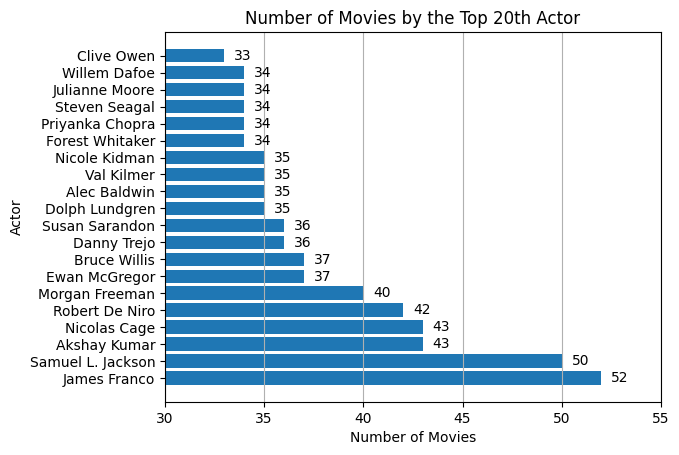

In [9]:
top_actors = actor_counts[:20].copy()
x = top_actors.index
y = top_actors.values

# Create the bar chart
plt.barh(x, y)

# Customize the chart
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Number of Movies by the Top 20th Actor')
plt.xlim(30, 55)
plt.grid(axis='x')
plt.xticks(range(30, 56, 5))

for i in range(len(x)):
    plt.text(y[i] + 0.5, i, str(y[i]), va='center')

# Display the chart
plt.show()

After getting the top 20th actors, the number of movies they acted by genre was studied.

In [10]:
genre = set()

for index, row in filtered_analysis.iterrows():
    list = ast.literal_eval(row['genre_list'])
    filtered_analysis.at[index,'genre_list'] = list
    for item in list:
        genre.add(item)



In [11]:
genre_columns = []
for item in genre:
    genre_columns.append(item)
genre_columns = sorted(genre_columns)
actors_genre = pd.DataFrame(columns=["Actors"] + genre_columns)
actors_genre['Actors'] = top_actors.index
actors_genre.iloc[:,1:] = 0
actors_genre = actors_genre.set_index('Actors')
actors_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Actors,,,,,,,,,,,,,,,,,,,,
James Franco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Samuel L. Jackson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Akshay Kumar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nicolas Cage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Robert De Niro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Morgan Freeman,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ewan McGregor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bruce Willis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Danny Trejo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
for index, row in filtered_analysis.iterrows():
    for actor in row['actor_names']:
        if actor in actors_genre.index:
            for gen in row['genre_list']:
                actors_genre.loc[actor, gen] += 1
actors_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Actors,,,,,,,,,,,,,,,,,,,,
James Franco,12,5,0,8,7,3,37,1,3,0,5,0,0,2,6,1,0,8,3,0
Samuel L. Jackson,24,17,4,7,19,3,23,3,4,0,1,3,1,9,2,6,0,25,1,1
Akshay Kumar,17,1,0,26,4,0,22,1,1,10,1,1,0,1,14,0,0,12,0,0
Nicolas Cage,21,7,4,8,14,0,19,4,8,0,3,3,0,4,2,4,0,26,2,0
Robert De Niro,10,1,1,18,10,3,16,1,0,0,1,2,0,4,6,2,1,11,0,0
Morgan Freeman,11,2,0,9,13,7,18,3,0,0,2,1,0,5,1,3,0,12,0,0
Ewan McGregor,10,9,3,7,4,2,18,5,2,0,2,0,2,3,8,5,0,13,3,1
Bruce Willis,19,2,2,16,16,0,14,3,1,0,0,0,2,4,2,3,0,22,3,0
Danny Trejo,25,2,1,9,8,2,7,0,4,0,0,12,0,2,0,5,0,15,0,2


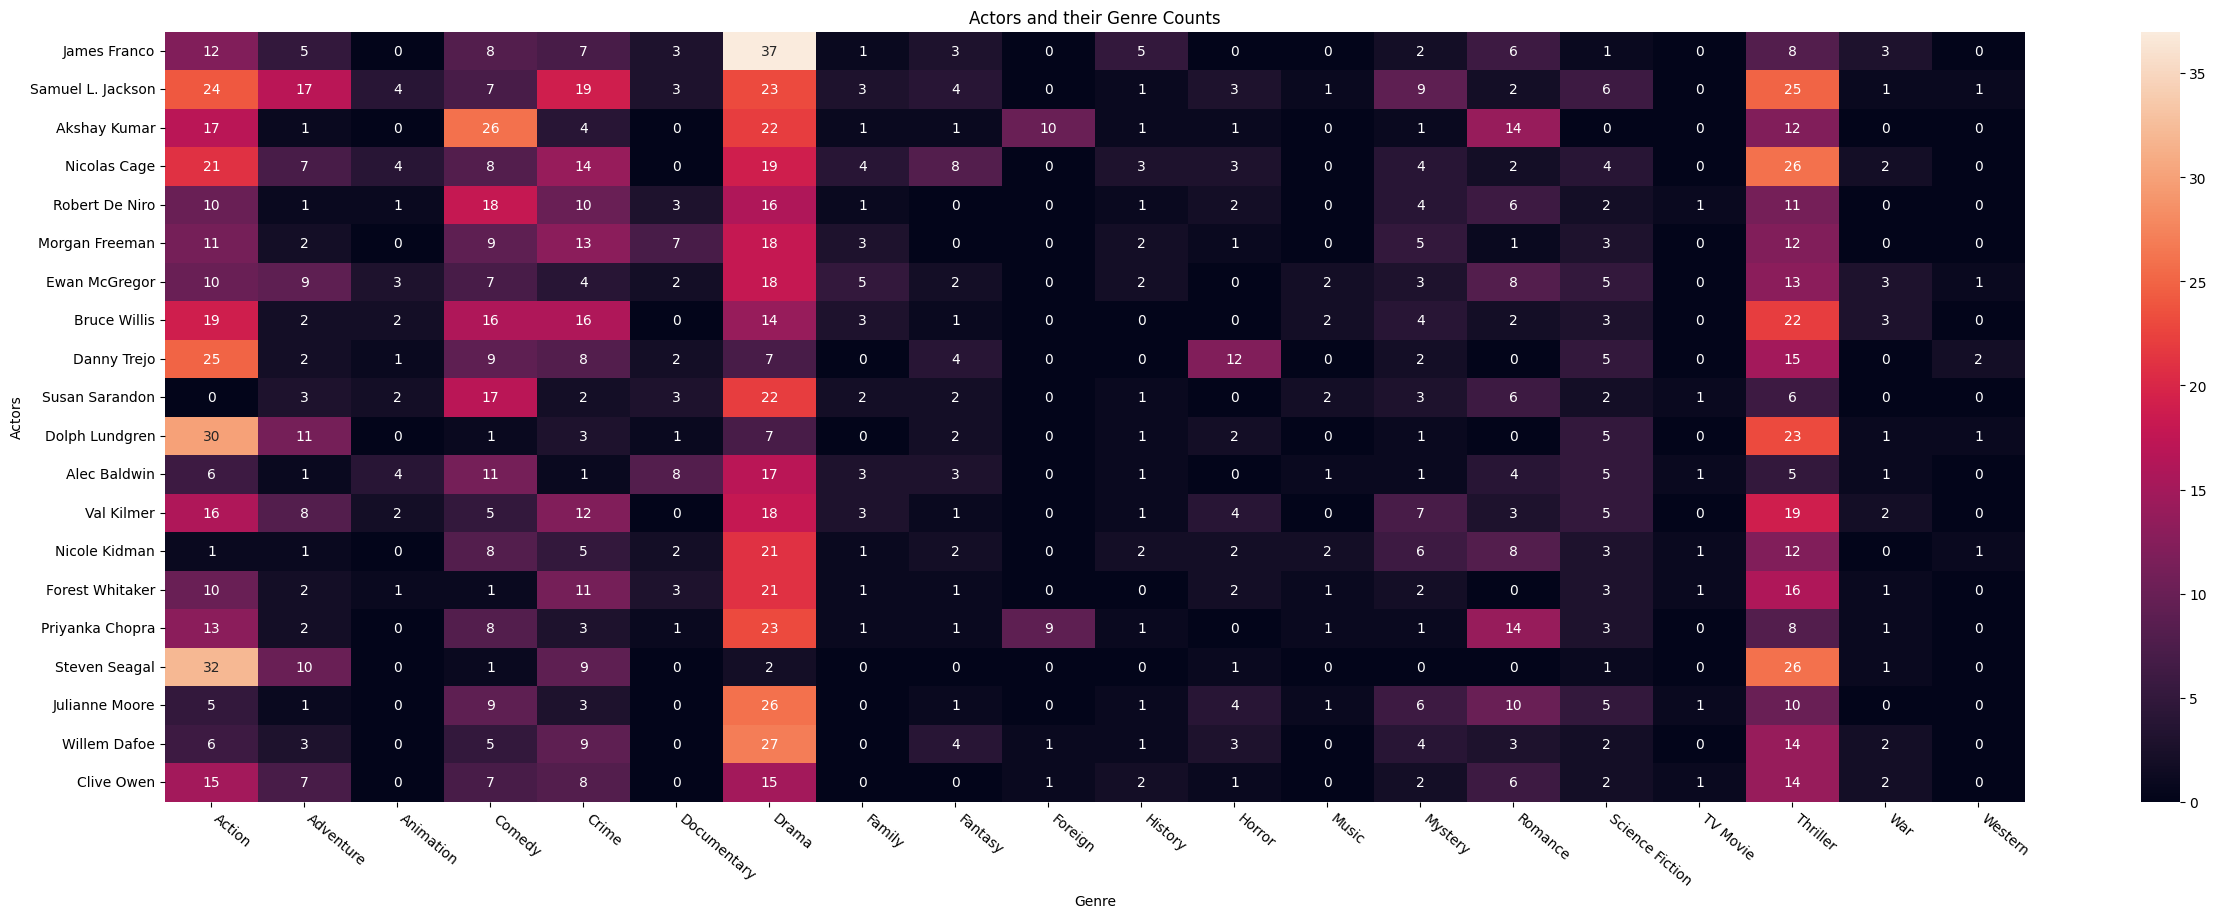

In [30]:
# Convert all columns except 'Actors' to numeric
numeric_columns = actors_genre.columns
actors_genre[numeric_columns] = actors_genre[numeric_columns].apply(pd.to_numeric)

# Create the heatmap
plt.figure(figsize=(30,10))
sns.heatmap(actors_genre, annot=True)
plt.title('Actors and their Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Actors')
plt.xticks(rotation=-40, ha='left')
# Display the heatmap
plt.show()

Findings: Majority of the top 20th actors mainly acted in 'Action', 'Drama', and 'Thriller' movies.

Next, the performance of actors was studied in terms of the 'budget','popularity','revenue', and 'bayesian_average'.

In [14]:
dropped_analysis = filtered_analysis.copy()
dropped_analysis

,budget,popularity,revenue,bayesian_average,release_date,genre_list_lengths,actor_names_lengths,genre_list,actor_names
0,0,0.003949,0.0,5.626,2002-03-20,2,2,"[Drama, Foreign]","[Francesco Sframeli, Spiro Scimone]"
1,0,0.147130,0.0,5.691,2010-05-25,2,3,"[Drama, Romance]","[Marcin Walewski, Magdalena Cielecka, Mariusz ..."
2,0,0.135596,0.0,5.647,2013-10-12,2,3,"[Comedy, Horror]","[Josh Feldman, Gus Kamp, Carolyn Jania]"
3,0,0.211754,0.0,5.665,2012-06-20,1,3,[Drama],"[James Cartwright, Geraldine James, Alex Kelly]"
4,0,0.501046,0.0,5.702,2012-03-22,1,3,[Documentary],"[Jeff Bridges, Tom Colicchio, Mariana Chilton]"
...,...,...,...,...,...,...,...,...,...
22108,0,0.139936,0.0,5.598,2015-01-11,2,3,"[Comedy, Drama]","[Markie Adams, Roberto Aguire, Tina Arning]"
22109,0,0.076061,0.0,5.651,2000-10-22,2,3,"[Mystery, Horror]","[Tony Abatemarco, Andre Brooks, Mariclare Cost..."
22110,0,0.386450,0.0,5.639,2000-10-03,1,3,[Horror],"[Monty Bane, Lucy Butler, David Grammer]"
22111,0,0.178241,0.0,5.715,2011-11-17,1,3,[Drama],"[Angel Aquino, Perry Dizon, Hazel Orencio]"


In [15]:
def mode_percentage(column):
    mode_value = column.mode().iloc[0]
    mode_count = (column == mode_value).sum()
    total_count = column.count()  
    return mode_value, (mode_count / total_count) * 100


mode_info = {col: mode_percentage(dropped_analysis[col]) for col in dropped_analysis.columns[0:4]}

for column, (value, percentage) in mode_info.items():
    print(f"{column}: Mode = {value}, Percentage = {percentage:.2f}%")


budget: Mode = 0, Percentage = 73.90%
popularity: Mode = 0.002353, Percentage = 0.02%
revenue: Mode = 0.0, Percentage = 79.64%
bayesian_average: Mode = 5.626, Percentage = 3.63%


Since there are 79.64% of data have no revenue data, these zero values would affect the interpretation of the following visualisations.
<br>Therefore, the rows that contains zero values were dropped. 

In [16]:
dropped_analysis = dropped_analysis[dropped_analysis['revenue'] > 0]
dropped_analysis = dropped_analysis[dropped_analysis['budget'] > 0]
dropped_analysis = dropped_analysis.reset_index(drop=True)
dropped_analysis

,budget,popularity,revenue,bayesian_average,release_date,genre_list_lengths,actor_names_lengths,genre_list,actor_names
0,11000000,10.065450,59827328.0,6.121,2000-01-12,1,3,[Comedy],"[Ice Cube, Mike Epps, Justin Pierce]"
1,90000000,5.496624,14828081.0,5.267,2000-01-14,3,3,"[Horror, Science Fiction, Thriller]","[James Spader, Angela Bassett, Robert Forster]"
2,36000000,0.907927,3003296.0,5.511,2000-01-28,2,3,"[Drama, Comedy]","[Bette Midler, Nathan Lane, Stockard Channing]"
3,40000000,9.738371,161834276.0,5.690,2000-02-03,2,3,"[Horror, Mystery]","[David Arquette, Neve Campbell, Courteney Cox]"
4,10000000,6.370105,1631839.0,5.586,2000-02-04,4,3,"[Action, Comedy, Romance, Thriller]","[Sandra Bullock, Liam Neeson, Oliver Platt]"
...,...,...,...,...,...,...,...,...,...
3408,12000000,1.323587,19000000.0,5.860,2007-06-14,3,3,"[Action, Comedy, Drama]","[Rajinikanth, Suman, Shriya Saran]"
3409,750000,0.201582,3.0,5.639,2014-06-05,2,3,"[Crime, Comedy]","[Andrey Muravyov, Yuliya Khlynina, Anton Shurt..."
3410,800000,0.903061,1328612.0,5.635,2006-11-23,2,3,"[Comedy, Drama]","[Marat Basharov, Yuriy Kutsenko, Vladislav Gal..."
3411,2000000,0.121844,1268793.0,5.584,2010-09-30,2,3,"[Romance, Drama]","[Fyodor Bondarchuk, Oksana Fandera, Juozas Bud..."


In [17]:
for column in dropped_analysis.columns[:7]:
    min = dropped_analysis[column].min()
    max = dropped_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 1  -  380000000


----- popularity -----
Range of values in 'popularity': 0.038876  -  547.488298


----- revenue -----
Range of values in 'revenue': 1.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.789  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-12 00:00:00  -  2017-08-04 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  7


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 1  -  3




In the columns 'budget' and 'revenue', there are data with value less than 100. When the budget and revenue were cross-checked in the internet, these data was found out to be a wrong input.
<br>Thus, by applying the distribution of variance, the bottom 2.2% of data were dropped.

In [18]:
drop_percent = 0.022
revenue_cutoff = dropped_analysis['revenue'].quantile(drop_percent)
dropped_analysis = dropped_analysis[dropped_analysis['revenue'] > revenue_cutoff]
budget_cutoff = dropped_analysis['budget'].quantile(drop_percent)
dropped_analysis = dropped_analysis[dropped_analysis['budget'] > budget_cutoff]
dropped_analysis = dropped_analysis.reset_index(drop=True)
dropped_analysis

,budget,popularity,revenue,bayesian_average,release_date,genre_list_lengths,actor_names_lengths,genre_list,actor_names
0,11000000,10.065450,59827328.0,6.121,2000-01-12,1,3,[Comedy],"[Ice Cube, Mike Epps, Justin Pierce]"
1,90000000,5.496624,14828081.0,5.267,2000-01-14,3,3,"[Horror, Science Fiction, Thriller]","[James Spader, Angela Bassett, Robert Forster]"
2,36000000,0.907927,3003296.0,5.511,2000-01-28,2,3,"[Drama, Comedy]","[Bette Midler, Nathan Lane, Stockard Channing]"
3,40000000,9.738371,161834276.0,5.690,2000-02-03,2,3,"[Horror, Mystery]","[David Arquette, Neve Campbell, Courteney Cox]"
4,10000000,6.370105,1631839.0,5.586,2000-02-04,4,3,"[Action, Comedy, Romance, Thriller]","[Sandra Bullock, Liam Neeson, Oliver Platt]"
...,...,...,...,...,...,...,...,...,...
3258,11000000,40.796775,184770205.0,6.725,2017-08-03,4,3,"[Action, Crime, Mystery, Thriller]","[Jeremy Renner, Elizabeth Olsen, Gil Birmingham]"
3259,12000000,1.323587,19000000.0,5.860,2007-06-14,3,3,"[Action, Comedy, Drama]","[Rajinikanth, Suman, Shriya Saran]"
3260,800000,0.903061,1328612.0,5.635,2006-11-23,2,3,"[Comedy, Drama]","[Marat Basharov, Yuriy Kutsenko, Vladislav Gal..."
3261,2000000,0.121844,1268793.0,5.584,2010-09-30,2,3,"[Romance, Drama]","[Fyodor Bondarchuk, Oksana Fandera, Juozas Bud..."


In [19]:
for column in dropped_analysis.columns[:7]:
    min = dropped_analysis[column].min()
    max = dropped_analysis[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- budget -----
Range of values in 'budget': 380000  -  380000000


----- popularity -----
Range of values in 'popularity': 0.039793  -  547.488298


----- revenue -----
Range of values in 'revenue': 21256.0  -  2787965087.0


----- bayesian_average -----
Range of values in 'bayesian_average': 3.789  -  8.276


----- release_date -----
Range of values in 'release_date': 2000-01-12 00:00:00  -  2017-08-04 00:00:00


----- genre_list_lengths -----
Range of values in 'genre_list_lengths': 0  -  7


----- actor_names_lengths -----
Range of values in 'actor_names_lengths': 1  -  3




In [20]:
actors = set()

for index, row in dropped_analysis.iterrows():
    for name in row['actor_names']:
        actors.add(name)

actors_list = []
for item in actors:
    actors_list.append(item)

In [21]:
column = ['Actors', 'Budget', 'Revenue', 'Popularity', 'Bayesian_average', 'No of Movies']
score = pd.DataFrame(columns = column)
score['Actors'] = actors_list
score.iloc[:,1:] = 0
score = score.set_index('Actors')
score

,Budget,Revenue,Popularity,Bayesian_average,No of Movies
Actors,,,,,
Joaquín Cosio,0,0,0,0,0
Bill Milner,0,0,0,0,0
Mannara Chopra,0,0,0,0,0
Olga Kurylenko,0,0,0,0,0
Dieter Hallervorden,0,0,0,0,0
...,...,...,...,...,...
Callie Hernandez,0,0,0,0,0
Tchéky Karyo,0,0,0,0,0
Freida Pinto,0,0,0,0,0


In [22]:
for index, row in dropped_analysis.iterrows():
    for name in row['actor_names']:
        score.loc[name, 'Budget'] += row['budget']
        score.loc[name, 'Revenue'] += row['revenue']
        score.loc[name, 'Popularity'] += row['popularity']
        score.loc[name, 'Bayesian_average'] += row['bayesian_average']
        score.loc[name, 'No of Movies'] += 1
score

,Budget,Revenue,Popularity,Bayesian_average,No of Movies
Actors,,,,,
Joaquín Cosio,4620000,2395000.0,0.546165,5.594,1
Bill Milner,4000000,6870249.0,7.391932,6.236,1
Mannara Chopra,1556288,1268395.0,0.195677,5.659,1
Olga Kurylenko,413500000,1027249315.0,85.928486,42.555,7
Dieter Hallervorden,13500000,3342697.0,8.969705,5.702,1
...,...,...,...,...,...
Callie Hernandez,5000000,45172994.0,11.901343,5.015,1
Tchéky Karyo,25000000,64437847.0,7.637345,6.193,1
Freida Pinto,188000000,871662729.0,65.999805,25.971,4


In [23]:
for column in score.columns:
    min = score[column].min()
    max = score[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- Budget -----
Range of values in 'Budget': 380000  -  3075000000


----- Revenue -----
Range of values in 'Revenue': 21256.0  -  9460433002.0


----- Popularity -----
Range of values in 'Popularity': 0.039793  -  694.5834550000001


----- Bayesian_average -----
Range of values in 'Bayesian_average': 3.878  -  193.32500000000007


----- No of Movies -----
Range of values in 'No of Movies': 1  -  30




In [24]:
avg_score = score.copy()
avg_score['Return rate'] = 0.0
for index, row in score.iterrows():
    if row['No of Movies'] > 1:
        avg_score.loc[index, 'Budget'] = row['Budget'] / row['No of Movies']
        avg_score.loc[index, 'Revenue'] = row['Revenue'] / row['No of Movies']
        avg_score.loc[index, 'Popularity'] = row['Popularity'] / row['No of Movies']
        avg_score.loc[index, 'Bayesian_average'] = row['Bayesian_average'] / row['No of Movies']
    avg_score.loc[index, 'Return rate'] = (row['Revenue'] - row['Budget']) / row['Budget']

avg_score = avg_score[['Budget', 'Revenue', 'Return rate', 'Popularity', 'Bayesian_average']].copy()
avg_score

,Budget,Revenue,Return rate,Popularity,Bayesian_average
Actors,,,,,
Joaquín Cosio,4620000,2395000.0,-0.481602,0.546165,5.594
Bill Milner,4000000,6870249.0,0.717562,7.391932,6.236
Mannara Chopra,1556288,1268395.0,-0.184987,0.195677,5.659
Olga Kurylenko,59071428.571429,146749902.142857,1.484279,12.275498,6.079286
Dieter Hallervorden,13500000,3342697.0,-0.752393,8.969705,5.702
...,...,...,...,...,...
Callie Hernandez,5000000,45172994.0,8.034599,11.901343,5.015
Tchéky Karyo,25000000,64437847.0,1.577514,7.637345,6.193
Freida Pinto,47000000.0,217915682.25,3.636504,16.499951,6.49275


In [25]:
for column in avg_score.columns:
    min = avg_score[column].min()
    max = avg_score[column].max()
    print(f"----- {column} -----")
    print(f"Range of values in '{column}':", min, ' - ', max)
    print("\n")

----- Budget -----
Range of values in 'Budget': 380000  -  260000000


----- Revenue -----
Range of values in 'Revenue': 21256.0  -  2068223624.0


----- Return rate -----
Range of values in 'Return rate': -0.9988660615384616  -  114.2952425


----- Popularity -----
Range of values in 'Popularity': 0.039793  -  213.849907


----- Bayesian_average -----
Range of values in 'Bayesian_average': 3.878  -  8.234




# Top 19th Actor in terms of Popularity and Bayesian_average

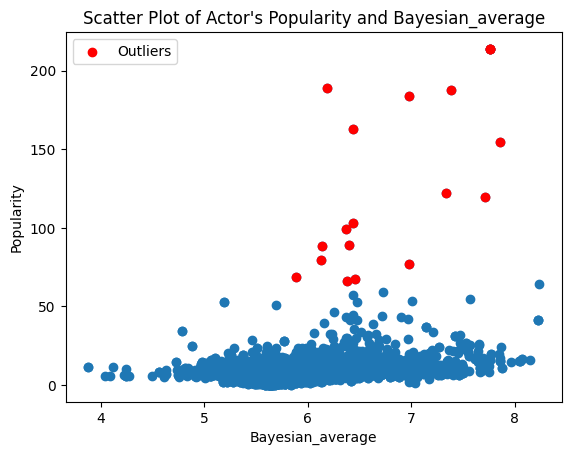

In [26]:
graph_data = avg_score

x = graph_data['Bayesian_average']
y = graph_data['Popularity']

# Convert x and y to numeric arrays
x = pd.to_numeric(x)
y = pd.to_numeric(y)

# Calculate z-scores for x and y
z_scores_x = np.abs(stats.zscore(x))
z_scores_y = np.abs(stats.zscore(y))

# Set a threshold for considering a point as an outlier (e.g., z-score > 2)
threshold = 5

# Find the indices of the outliers
outlier_indices = np.where((z_scores_x > threshold) | (z_scores_y > threshold))[0]

# Create the scatter plot
plt.scatter(x, y)

# Highlight the outliers
plt.scatter(
    [x.iloc[i,] for i in outlier_indices],
    [y.iloc[i,] for i in outlier_indices],
    color='red',
    label='Outliers'
)

# Add labels and title
plt.xlabel('Bayesian_average')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Actor\'s Popularity and Bayesian_average')

# Display the plot
plt.legend()
plt.show()

In [27]:
outliers = graph_data.iloc[outlier_indices]
outliers = outliers.sort_values(by='Popularity', ascending=False)
outliers

,Budget,Revenue,Return rate,Popularity,Bayesian_average
Actors,,,,,
Daniel Henney,165000000,652105443.0,2.952154,213.849907,7.762
Scott Adsit,165000000,652105443.0,2.952154,213.849907,7.762
Ryan Potter,165000000,652105443.0,2.952154,213.849907,7.762
Jon Hamm,46333333.333333,408319111.333333,7.812643,188.80913,6.183667
Morena Baccarin,58000000,783112979.0,12.501948,187.860492,7.383
Alfie Allen,20000000,88761661.0,3.438083,183.870374,6.973
Gal Gadot,199500000.0,846920320.5,3.245215,162.886458,6.4325
Carrie Coon,61000000,369330363.0,5.054596,154.801009,7.859
Ansel Elgort,23000000.0,265839076.5,10.558221,122.153699,7.3325


# Top 28th Actor in terms of Bayesian_average and Return rate

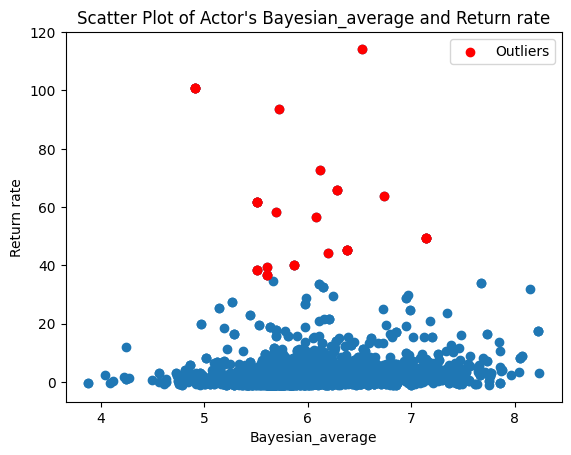

In [28]:
graph_data = avg_score

x = graph_data['Bayesian_average']
y = graph_data['Return rate']

# Convert x and y to numeric arrays
x = pd.to_numeric(x)
y = pd.to_numeric(y)

# Calculate z-scores for x and y
z_scores_x = np.abs(stats.zscore(x))
z_scores_y = np.abs(stats.zscore(y))

# Set a threshold for considering a point as an outlier (e.g., z-score > 2)
threshold = 5

# Find the indices of the outliers
outlier_indices = np.where((z_scores_x > threshold) | (z_scores_y > threshold))[0]

# Create the scatter plot
plt.scatter(x, y)

# Highlight the outliers
plt.scatter(
    [x.iloc[i,] for i in outlier_indices],
    [y.iloc[i,] for i in outlier_indices],
    color='red',
    label='Outliers'
)

# Add labels and title
plt.xlabel('Bayesian_average')
plt.ylabel('Return rate')
plt.title('Scatter Plot of Actor\'s Bayesian_average and Return rate')

# Display the plot
plt.legend()
plt.show()

In [29]:
outliers = graph_data.iloc[outlier_indices]
outliers = outliers.sort_values(by='Return rate', ascending=False)
outliers

,Budget,Revenue,Return rate,Popularity,Bayesian_average
Actors,,,,,
Aaron Ruell,400000,46118097.0,114.295243,10.287419,6.524
Fernanda Andrade,1000000,101758490.0,100.758490,5.747675,4.905
Simon Quarterman,1000000,101758490.0,100.758490,5.747675,4.905
Evan Helmuth,1000000,101758490.0,100.758490,5.747675,4.905
Xu Zheng,2200000,208000000.0,93.545455,1.789133,5.722
Lainie Kazan,5000000,368744044.0,72.748809,6.719949,6.12
Erin Bethea,500000,33456317.0,65.912634,5.329195,6.277
Kirk Cameron,500000,33456317.0,65.912634,5.329195,6.277
Ty Simpkins,1500000,97009150.0,63.672767,17.24814,6.731
